<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Developed_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
#Define Constants
batch_size = 128
iteration = 3
num = 10

In [4]:
#Download Mnist Dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#Normalize the input image so that each pixel value
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
#Define the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Reshape(target_shape = (28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation= tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
   
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num,activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [7]:
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels),epochs=iteration, batch_size=batch_size)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


469/469 [==============================] - 101s 213ms/step - loss: 0.2503 - accuracy: 0.9240 - val_loss: 0.0551 - val_accuracy: 0.9829
Epoch 2/3
469/469 [==============================] - 100s 213ms/step - loss: 0.0844 - accuracy: 0.9753 - val_loss: 0.0423 - val_accuracy: 0.9860
Epoch 3/3
469/469 [==============================] - 100s 212ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0345 - val_accuracy: 0.9887


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuarcy', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0345 - accuracy: 0.9887
Test Accuarcy 0.9886999726295471


In [9]:
#Helper function to display digit images

def show_sample(images, labels, sample_count=25):
  #create a Square with can fit{sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  print(grid_count)
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

Text(0, 0.5, 'accuracy')

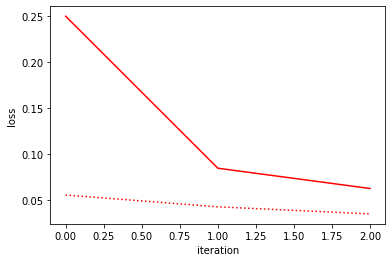

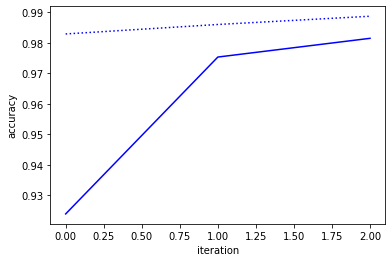

In [12]:
#Evaluate the model using test dataset
fig,loss_ax = plt.subplots()
fig,acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'],'r-',label='train_loss')
loss_ax.plot(history.history['val_loss'],'r:',label='validation_loss')
loss_ax.set_xlabel('iteration')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'],'b-',label='train_acc')
acc_ax.plot(history.history['val_accuracy'],'b:',label='val_acc')
acc_ax.set_xlabel('iteration')
acc_ax.set_ylabel('accuracy')